In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [21]:
weather = pd.read_csv('Final_Data/London_weather_hourly_winter_2013-14_(00).csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index(['Unnamed: 0', 'Datetime', 'Dew_Point_F', 'Temperature_F',
       'Wind_Speed_MPH'],
      dtype='object')

In [22]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [23]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2899 entries, 2013-12-01 00:00:00 to 2014-03-31 22:00:00
Data columns (total 5 columns):
Unnamed: 0        2899 non-null object
Datetime          2899 non-null object
Dew_Point_F       2899 non-null float64
Temperature_F     2899 non-null float64
Wind_Speed_MPH    2899 non-null object
dtypes: float64(2), object(3)
memory usage: 135.9+ KB


In [24]:
energy = pd.read_csv('Final_Data/energy_final_2013_14.csv', skiprows=2, parse_dates=[0], infer_datetime_format=True)
energy.iloc[:,1:].convert_objects(convert_numeric=True)
energy.columns

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index(['DateTime', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [25]:
energy.index = pd.DatetimeIndex(energy.DateTime)

In [26]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2136 entries, 2013-12-01 01:00:00 to 2014-02-28 00:00:00
Data columns (total 4 columns):
DateTime      2136 non-null datetime64[ns]
Unnamed: 1    2136 non-null float64
Unnamed: 2    2136 non-null float64
Unnamed: 3    2136 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 83.4 KB


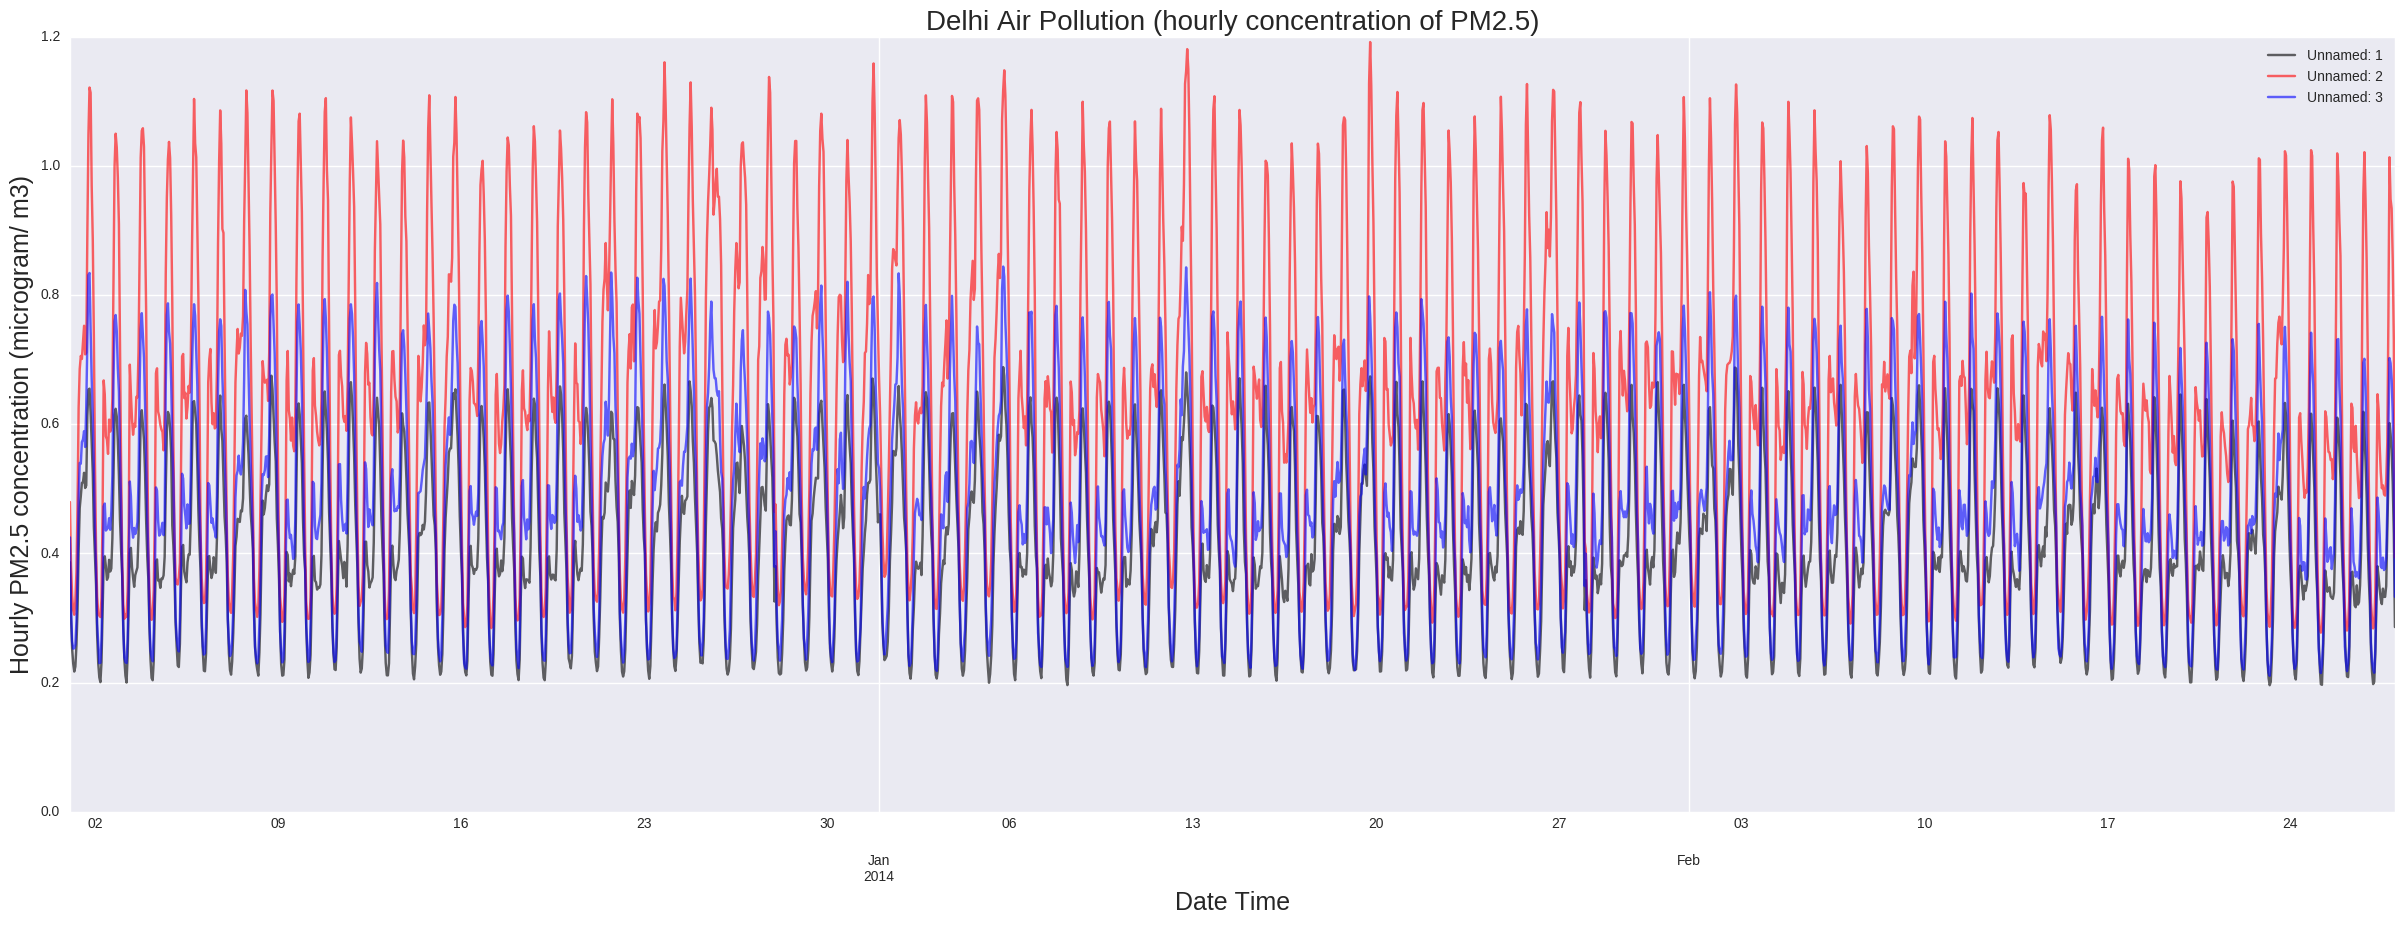

In [27]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy.plot(x='DateTime', y='Unnamed: 1', color='Black',alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Unnamed: 2', color='Red', alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Unnamed: 3', color='Blue',alpha=.6, ax=ax)
pl.title('Delhi Air Pollution (hourly concentration of PM2.5)', fontsize=20)
pl.ylabel("Hourly PM2.5 concentration (microgram/ m3)", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [28]:
#weather = weather.convert_objects(convert_numeric=True)
weather1 = weather[:2136]
weather1.head()

,Unnamed: 0,Datetime,Dew_Point_F,Temperature_F,Wind_Speed_MPH
2013-12-01 00:00:00,0,2013-12-01 00:00:00,32.0,33.8,4.6
2013-12-01 01:00:00,1,2013-12-01 01:00:00,33.8,33.8,4.6
2013-12-01 02:00:00,2,2013-12-01 02:00:00,33.8,35.6,4.6
2013-12-01 03:00:00,3,2013-12-01 03:00:00,35.6,35.6,4.6
2013-12-01 04:00:00,4,2013-12-01 04:00:00,35.6,37.4,8.1


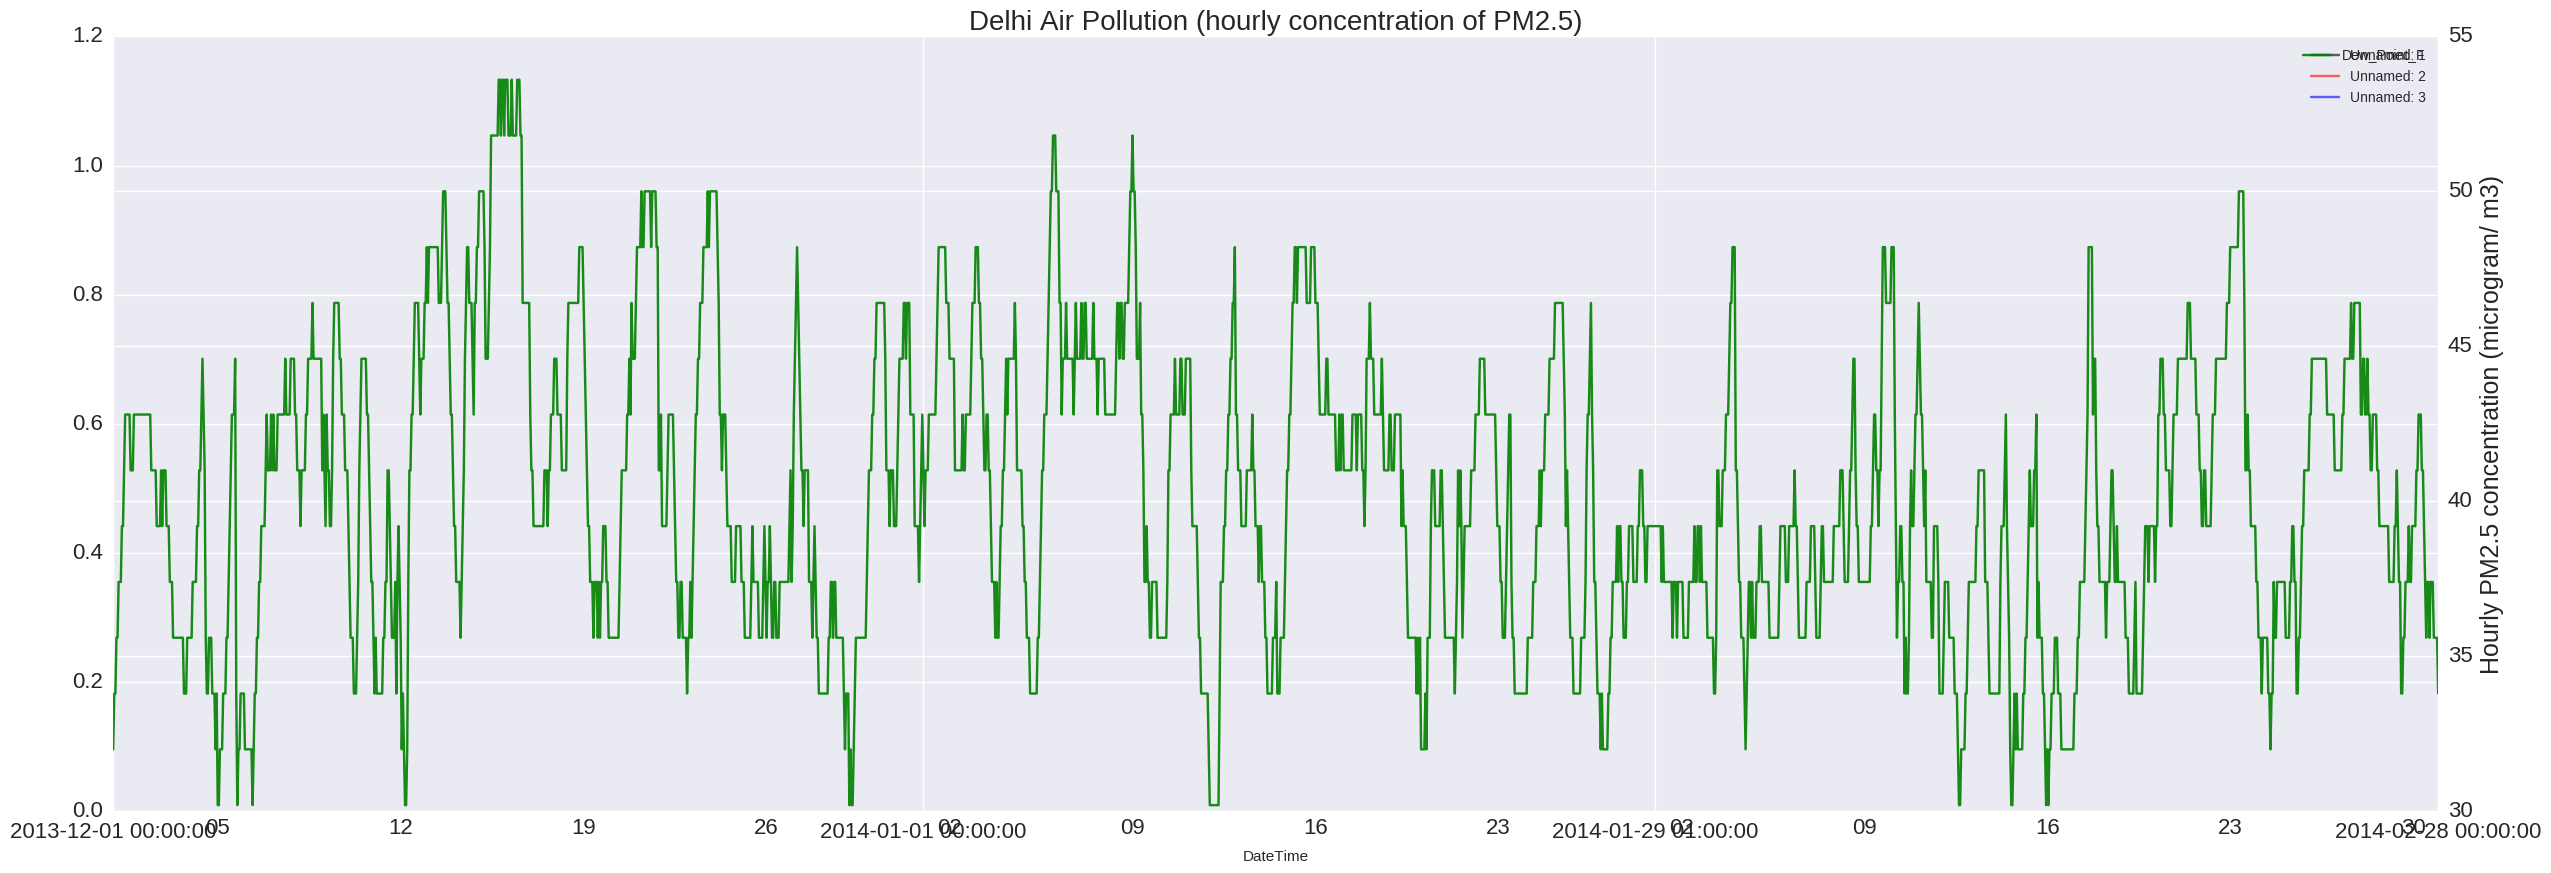

In [33]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax.twinx()
energy.plot(x='DateTime', y='Unnamed: 1',
                fontsize=16, color='Black',alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Unnamed: 2',
                fontsize=16, color='Red', alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Unnamed: 3',
                fontsize=16, color='Blue',alpha=.6, ax=ax)
weather1.plot(x='Datetime', y='Dew_Point_F',
                fontsize=16, color='green', alpha=.9, ax=ax2)
pl.title('Delhi Air Pollution (hourly concentration of PM2.5)', fontsize=20)
pl.ylabel("Hourly PM2.5 concentration (microgram/ m3)", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [34]:

import statsmodels.api as sm


In [35]:
energy.head()

,DateTime,Unnamed: 1,Unnamed: 2,Unnamed: 3
2013-12-01 01:00:00,2013-12-01 01:00:00,0.386444,0.479599,0.424813
2013-12-01 02:00:00,2013-12-01 02:00:00,0.301773,0.381671,0.314566
2013-12-01 03:00:00,2013-12-01 03:00:00,0.253057,0.335496,0.263379
2013-12-01 04:00:00,2013-12-01 04:00:00,0.229611,0.312186,0.252521
2013-12-01 05:00:00,2013-12-01 05:00:00,0.217060,0.305041,0.253142


In [39]:
df_new = energy['Unnamed: 1']
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.Close.values)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

AttributeError: 'Series' object has no attribute 'Close'